### 기존데이터 불러오기(이건 무시..)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# 경기 데이터
game_2016 = pd.read_csv('data\game_2016.csv', encoding='CP949')
game_2017 = pd.read_csv('data\game_2017.csv', encoding='CP949')
game_2018 = pd.read_csv('data\game_2018.csv', encoding='CP949')
game_2019 = pd.read_csv('data\game_2019.csv', encoding='CP949')
game_2020 = pd.read_csv('data\game_2020.csv', encoding='CP949')

In [5]:
# 선수 데이터 
players_2016 = pd.read_csv('data\players_2016.csv', encoding='CP949')
players_2017 = pd.read_csv('data\players_2017.csv', encoding='CP949')
players_2018 = pd.read_csv('data\players_2018.csv', encoding='CP949')
players_2019 = pd.read_csv('data\players_2019.csv', encoding='CP949')
players_2020 = pd.read_csv('data\players_2020.csv', encoding='CP949')

In [6]:
# 개인 투수 
private_pitcher_2016 = pd.read_csv('data\private_pitcher_2016.csv',encoding='CP949')
private_pitcher_2017 = pd.read_csv('data\private_pitcher_2017.csv',encoding='CP949')
private_pitcher_2018 = pd.read_csv('data\private_pitcher_2018.csv',encoding='CP949')
private_pitcher_2019 = pd.read_csv('data\private_pitcher_2019.csv',encoding='CP949')
private_pitcher_2020 = pd.read_csv('data\private_pitcher_2020.csv',encoding='CP949')

In [7]:
# 개인 타자 
private_batter_2016 = pd.read_csv('data\private_batter_2016.csv', encoding='CP949')
private_batter_2017 = pd.read_csv('data\private_batter_2017.csv', encoding='CP949')
private_batter_2018 = pd.read_csv('data\private_batter_2018.csv', encoding='CP949')
private_batter_2019 = pd.read_csv('data\private_batter_2019.csv', encoding='CP949')
private_batter_2020 = pd.read_csv('data\private_batter_2020.csv', encoding='CP949')

In [8]:
# 팀 투수
team_pitcher_2016 = pd.read_csv('data\\team_pitcher_2016.csv',encoding='CP949')
team_pitcher_2017 = pd.read_csv('data\\team_pitcher_2017.csv',encoding='CP949')
team_pitcher_2018 = pd.read_csv('data\\team_pitcher_2018.csv',encoding='CP949')
team_pitcher_2019 = pd.read_csv('data\\team_pitcher_2019.csv',encoding='CP949')
team_pitcher_2020 = pd.read_csv('data\\team_pitcher_2020.csv',encoding='CP949')

In [9]:
# 팀 타자 
team_batter_2016 = pd.read_csv('data\\team_batter_2016.csv', encoding='CP949')
team_batter_2017 = pd.read_csv('data\\team_batter_2017.csv', encoding='CP949')
team_batter_2018 = pd.read_csv('data\\team_batter_2018.csv', encoding='CP949')
team_batter_2019 = pd.read_csv('data\\team_batter_2019.csv', encoding='CP949')
team_batter_2020 = pd.read_csv('data\\team_batter_2020.csv', encoding='CP949')

In [10]:
# 팀
team = pd.read_csv('data\\team_2016.csv', encoding='CP949')

# 1. 연도별 데이터 하나의 데이터로 합치기 
- 등록선수 데이터 버리기
- 팀데이터는 연도별로 동일

In [11]:
game = pd.concat([game_2016,game_2017,game_2018,game_2019,game_2020])
players = pd.concat([players_2016,players_2017,players_2018,players_2019,players_2020])
private_pitcher = pd.concat([private_pitcher_2016,private_pitcher_2017,private_pitcher_2018,private_pitcher_2019,private_pitcher_2020])
private_batter = pd.concat([private_batter_2016,private_batter_2017,private_batter_2018,private_batter_2019,private_batter_2020])
team_pitcher = pd.concat([team_pitcher_2016,team_pitcher_2017,team_pitcher_2018,team_pitcher_2019,team_pitcher_2020])
team_batter = pd.concat([team_batter_2016,team_batter_2017,team_batter_2018,team_batter_2019,team_batter_2020])

In [12]:
game.to_csv('data\game.csv',index=False)
players.to_csv('data\players.csv',index=False)
private_pitcher.to_csv('data\private_pitcher.csv',index=False)
private_batter.to_csv('data\private_batter.csv',index=False)
team_pitcher.to_csv('data\\team_pitcher.csv',index=False)
team_batter.to_csv('data\\team_batter.csv',index=False)
team.to_csv('data\\team.csv',index=False)

# 2. 새로운 변수 추가 (투수관련)

### 3) 방어율(ERA): ER*9 / (INN2/3)

- (총 자책점 * 9 ) / 총 던진 이닝수 

In [13]:
private_pitcher['ERA'] = private_pitcher['ER'] / (private_pitcher['INN2']/3)
private_pitcher['ERA'] = private_pitcher['ERA'].fillna(0)

In [14]:
team_pitcher['ERA'] = team_pitcher['ER'] / (team_pitcher['INN2']/3)
team_pitcher['ERA'] = team_pitcher['ERA'].fillna(0)

### 8) BABIP

= 인플레이 타구 (방망이에 공이 맞았을 때)의 안타 비율 (타자, 투수 모두에게 사용 가능한 지표)

= 저희 조의 경우 타자보다는 투수에서 사용하는 것이 나을 듯 함

In [15]:
private_pitcher['BABIP'] = (private_pitcher['HIT'] - private_pitcher['HR']) / (private_pitcher['AB'] - private_pitcher['KK'] - private_pitcher['HR'] + private_pitcher['SF'])

In [16]:
team_pitcher['BABIP'] = (team_pitcher['HIT'] - team_pitcher['HR']) / (team_pitcher['AB'] - team_pitcher['KK'] - team_pitcher['HR'] + team_pitcher['SF'])

In [17]:
private_pitcher.head()

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,P_ID,START_CK,RELIEF_CK,CG_CK,...,WP,BK,ERR,R,ER,P_WHIP_RT,P2_WHIP_RT,CB_WHIP_RT,ERA,BABIP
0,20160401HHLG0,20160401,LG,HH,0,B,60146,0,1,0,...,0,0,0,0,0,0.000000,1.000000,1.50,0.000000,0.250000
1,20160401HHLG0,20160401,LG,HH,0,B,61891,0,1,0,...,0,0,0,0,0,0.000000,1.800000,1.50,0.000000,0.400000
2,20160401HHLG0,20160401,LG,HH,0,B,62146,0,1,0,...,0,0,0,0,0,0.000000,3.000000,0.00,0.000000,0.500000
3,20160401HHLG0,20160401,LG,HH,0,B,62698,1,0,0,...,0,0,0,4,4,0.818182,1.588235,3.75,0.666667,0.428571
4,20160401HHLG0,20160401,HH,LG,0,T,65764,0,1,0,...,0,0,0,1,1,0.000000,1.500000,0.00,0.750000,0.333333


### kwERA

- 탈삼진/볼넷 비율 만으로 성적을 예측하는 시스템

- 5.40 - 12(KK-BB)/상대 타자 수

- 다음시즌의 성적을 예측 하는 데에 있어 편리하다고 함

- 방어율과 비슷한 범위의 값이 나온다.

    => 방어율 = (자책점/이닝) * 9
    
    => (방어율 / 9) * 이닝 = 자책점
    
    => 이 식에서 방어율 대신 kwERA 값 대입 => 실점 정도 예측 가능

    => 다만 19년 자료로 kwERA 구해서 20시즌 예측값으로 사용할 것인지? / 20년 자료를 가지고 나머지 성적을 예측할 것인지 사용방법 고민 필요 해보임


In [18]:
private_pitcher['kwERA'] = 5.40 - 12*(private_pitcher['KK'] - private_pitcher['BB'])/private_pitcher['PA']
private_pitcher.head()

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,P_ID,START_CK,RELIEF_CK,CG_CK,...,BK,ERR,R,ER,P_WHIP_RT,P2_WHIP_RT,CB_WHIP_RT,ERA,BABIP,kwERA
0,20160401HHLG0,20160401,LG,HH,0,B,60146,0,1,0,...,0,0,0,0,0.000000,1.000000,1.50,0.000000,0.250000,2.400000
1,20160401HHLG0,20160401,LG,HH,0,B,61891,0,1,0,...,0,0,0,0,0.000000,1.800000,1.50,0.000000,0.400000,5.400000
2,20160401HHLG0,20160401,LG,HH,0,B,62146,0,1,0,...,0,0,0,0,0.000000,3.000000,0.00,0.000000,0.500000,5.400000
3,20160401HHLG0,20160401,LG,HH,0,B,62698,1,0,0,...,0,0,4,4,0.818182,1.588235,3.75,0.666667,0.428571,4.114286
4,20160401HHLG0,20160401,HH,LG,0,T,65764,0,1,0,...,0,0,1,1,0.000000,1.500000,0.00,0.750000,0.333333,5.400000


In [19]:
team_pitcher['kwERA'] = 5.40 - 12*(team_pitcher['KK'] - team_pitcher['BB'])/team_pitcher['PA']
team_pitcher.head()

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,...,BK,ERR,R,ER,P_WHIP_RT,P2_WHIP_RT,CB_WHIP_RT,ERA,BABIP,kwERA
0,20160401HHLG0,20160401,LG,HH,0,B,0,W,0,36,...,0,0,4,4,0.642857,1.285714,2.400000,0.333333,0.361111,3.784615
1,20160401HHLG0,20160401,HH,LG,0,T,0,L,0,34,...,0,0,5,4,1.500000,1.000000,0.750000,0.352941,0.266667,3.612766
2,20160401HTNC0,20160401,NC,HT,0,B,0,W,0,27,...,0,0,4,4,1.333333,1.038462,2.142857,0.444444,0.304348,3.189474
3,20160401HTNC0,20160401,HT,NC,0,T,0,L,0,24,...,0,0,5,5,0.500000,1.695652,1.875000,0.625000,0.368421,4.066667
4,20160401KTSK0,20160401,SK,KT,0,B,0,L,0,27,...,0,0,8,8,1.000000,2.357143,2.250000,0.888889,0.321429,4.542857


# 3. Feature Selecting 
- 개인 데이터, 팀 데이터 고려해서 각각 모델링을 하고 성능이 더 좋은 것을 사용하기로 함

### 개인투수

In [20]:
private_pitcher.columns

Index(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'P_ID',
       'START_CK', 'RELIEF_CK', 'CG_CK', 'QUIT_CK', 'WLS', 'HOLD', 'INN2',
       'BF', 'PA', 'AB', 'HIT', 'H2', 'H3', 'HR', 'SB', 'CS', 'SH', 'SF', 'BB',
       'IB', 'HP', 'KK', 'GD', 'WP', 'BK', 'ERR', 'R', 'ER', 'P_WHIP_RT',
       'P2_WHIP_RT', 'CB_WHIP_RT', 'ERA', 'BABIP', 'kwERA'],
      dtype='object')

In [21]:
private_pitcher = private_pitcher[['TB_SC','INN2','BF','AB','HIT','H2','H3','HR','KK','WP','ER','ERA','BABIP','kwERA']]

In [22]:
private_pitcher.columns

Index(['TB_SC', 'INN2', 'BF', 'AB', 'HIT', 'H2', 'H3', 'HR', 'KK', 'WP', 'ER',
       'ERA', 'BABIP', 'kwERA'],
      dtype='object')

In [23]:
private_pitcher.head()

,TB_SC,INN2,BF,AB,HIT,H2,H3,HR,KK,WP,ER,ERA,BABIP,kwERA
0,B,6,29,7,1,0,0,0,3,0,0,0.000000,0.250000,2.400000
1,B,5,33,6,2,0,0,0,1,0,0,0.000000,0.400000,5.400000
2,B,1,7,2,1,0,0,0,0,0,0,0.000000,0.500000,5.400000
3,B,18,94,25,9,2,0,0,4,0,4,0.666667,0.428571,4.114286
4,T,4,27,4,1,1,0,0,1,0,1,0.750000,0.333333,5.400000


### 팀 투수

In [24]:
team_pitcher = team_pitcher[['TB_SC','INN2','BF','AB','HIT','H2','H3','HR','KK','WP','ER','ERA','BABIP','kwERA']]

In [25]:
team_pitcher.head()

,TB_SC,INN2,BF,AB,HIT,H2,H3,HR,KK,WP,ER,ERA,BABIP,kwERA
0,B,36,184,46,13,2,0,0,10,0,4,0.333333,0.361111,3.784615
1,T,34,196,42,9,2,0,1,11,1,4,0.352941,0.266667,3.612766
2,B,27,143,34,8,3,0,1,10,2,4,0.444444,0.304348,3.189474
3,T,24,147,30,9,2,0,2,9,0,5,0.625000,0.368421,4.066667
4,B,27,151,36,11,0,0,2,7,0,8,0.888889,0.321429,4.542857


### 피처셀렉팅, 새로운 변수추가된 데이터 /data에 저장

In [26]:
game.to_csv('data\game.csv',index=False)
players.to_csv('data\players.csv',index=False)
private_pitcher.to_csv('data\private_pitcher.csv',index=False)
private_batter.to_csv('data\private_batter.csv',index=False)
team_pitcher.to_csv('data\\team_pitcher.csv',index=False)
team_batter.to_csv('data\\team_batter.csv',index=False)

# 4. Null값 확인
- null값은 없어 보인다

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
print(game.shape)
print(game.isna().sum())
print(np.sum(game=="?", axis=1).value_counts())

(3200, 7)
G_ID         0
GDAY_DS      0
VISIT_KEY    0
HOME_KEY     0
HEADER_NO    0
GWEEK        0
STADIUM      0
dtype: int64
0    3200
dtype: int64


In [29]:
print(players.shape)
print(players.isna().sum())
print(np.sum(players=="?", axis=1).value_counts())

(3271, 7)
GYEAR       0
PCODE       0
NAME        0
T_ID        0
POSITION    0
AGE_VA      0
MONEY       1
dtype: int64
0    3271
dtype: int64


In [30]:
print(team.shape)
print(team.isna().sum())
print(np.sum(team=="?", axis=1).value_counts())

(10, 2)
T_ID    0
T_NM    0
dtype: int64
0    10
dtype: int64


In [31]:
print(private_batter.shape)
print(private_batter.isna().sum())
print(np.sum(private_batter=="?", axis=1).value_counts())

(81102, 31)
G_ID            0
GDAY_DS         0
T_ID            0
VS_T_ID         0
HEADER_NO       0
TB_SC           0
P_ID            0
START_CK        0
BAT_ORDER_NO    0
PA              0
AB              0
RBI             0
RUN             0
HIT             0
H2              0
H3              0
HR              0
SB              0
CS              0
SH              0
SF              0
BB              0
IB              0
HP              0
KK              0
GD              0
ERR             0
LOB             0
P_HRA_RT        0
P_AB_CN         0
P_HIT_CN        0
dtype: int64
0    81102
dtype: int64


In [32]:
print(private_pitcher.shape)
print(private_pitcher.isna().sum())
print(np.sum(private_pitcher=="?", axis=1).value_counts())

(27804, 14)
TB_SC       0
INN2        0
BF          0
AB          0
HIT         0
H2          0
H3          0
HR          0
KK          0
WP          0
ER          0
ERA         0
BABIP    1087
kwERA      18
dtype: int64
0    27804
dtype: int64


## 의문점

### 1. 개인투수 데이터에서 투수가 등판해서 홈런만 맞거나, 삼진으로 모든 아웃카운트를 처리했을 경우 BABIP 값은 계산될 수 없어 NULL값이 나온다. 

=> 표본(이닝)이 적어서 발생하는 문제. 이닝 수가 많아지면 결국 누군가는 공을 건드릴 것이므로 해결되는 문제이긴 함 (팀 투수의 경우 이런 경우  없음)

=> **이걸 0으로 대체하는 것이 맞을까...?**


### 2. BABIP 자체도 어떻게 사용할지...

In [33]:
private_pitcher[private_pitcher['BABIP'].isna()]

,TB_SC,INN2,BF,AB,HIT,H2,H3,HR,KK,WP,ER,ERA,BABIP,kwERA
17,B,3,12,3,0,0,0,0,3,0,0,0.0,NaN,-6.6
24,T,2,7,2,0,0,0,0,2,0,0,0.0,NaN,-6.6
38,B,0,2,0,0,0,0,0,0,0,0,0.0,NaN,5.4
47,T,0,16,0,0,0,0,0,0,0,1,inf,NaN,17.4
51,B,1,6,1,0,0,0,0,1,0,0,0.0,NaN,-6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724,T,1,5,1,0,0,0,0,1,0,0,0.0,NaN,-6.6
2760,B,3,18,3,0,0,0,0,3,0,0,0.0,NaN,-6.6
2766,T,1,4,1,0,0,0,0,1,0,0,0.0,NaN,-6.6
2809,B,1,10,1,0,0,0,0,1,0,0,0.0,NaN,5.4


In [34]:
private_pitcher[private_pitcher['kwERA'].isna()]

,TB_SC,INN2,BF,AB,HIT,H2,H3,HR,KK,WP,ER,ERA,BABIP,kwERA
171,B,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN
777,T,1,3,0,0,0,0,0,0,0,0,0.0,NaN,NaN
2883,T,1,1,0,0,0,0,0,0,0,0,0.0,NaN,NaN
125,T,0,1,0,0,0,0,0,0,0,0,0.0,NaN,NaN
133,B,0,3,0,0,0,0,0,0,0,0,0.0,NaN,NaN
2909,B,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN
4151,B,1,5,0,0,0,0,0,0,0,0,0.0,NaN,NaN
5986,T,0,1,0,0,0,0,0,0,0,0,0.0,NaN,NaN
1313,B,1,4,0,0,0,0,0,0,0,0,0.0,NaN,NaN
1397,B,0,5,0,0,0,0,0,0,0,0,0.0,NaN,NaN


## 3. 볼넷이나 삼진을 하나도 잡지 못한 경우에 kwERA 결측치 발생

### => 얘도 babip처럼 팀데이터로 하면 결측치 사라짐

### => 개인데이터 사용할 경우 얘는 어떻게 바꿔줘야할지

In [35]:
private_pitcher['BABIP'] = private_pitcher['BABIP'].replace(np.nan,0)
private_pitcher['BABIP'].isna().sum()

0

In [36]:
print(team_pitcher.shape)
print(team_pitcher.isna().sum())
print(np.sum(team_pitcher=="?", axis=1).value_counts())

(6400, 14)
TB_SC    0
INN2     0
BF       0
AB       0
HIT      0
H2       0
H3       0
HR       0
KK       0
WP       0
ER       0
ERA      0
BABIP    0
kwERA    0
dtype: int64
0    6400
dtype: int64


# 5. X 변수 간 correlation 확인

- private_pitcher에서 높은 상관관계를 보이는 변수들이 있어 조정이 필요하다
- private_batter, team_pitcher, team_batter 데이터 x변수는 그대로 사용 가능할듯..

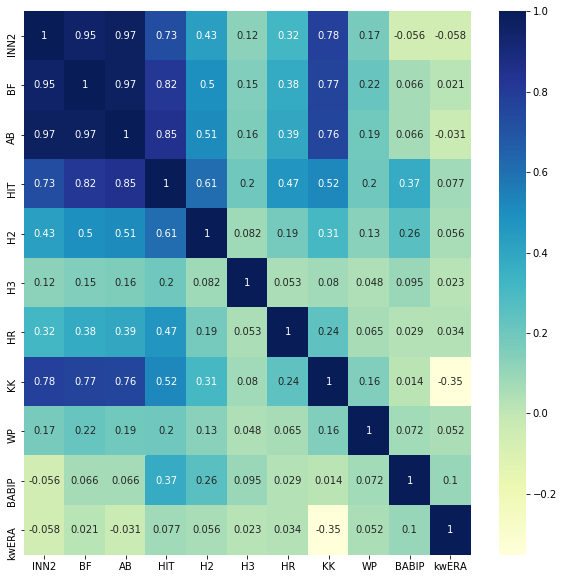

In [44]:
temp = private_pitcher.drop(['ER','ERA'],axis=1) #종속변수 drop
figure,ax1 = plt.subplots()
figure.set_size_inches(10,10)

sns.heatmap(temp.corr(),annot=True,cmap='YlGnBu')

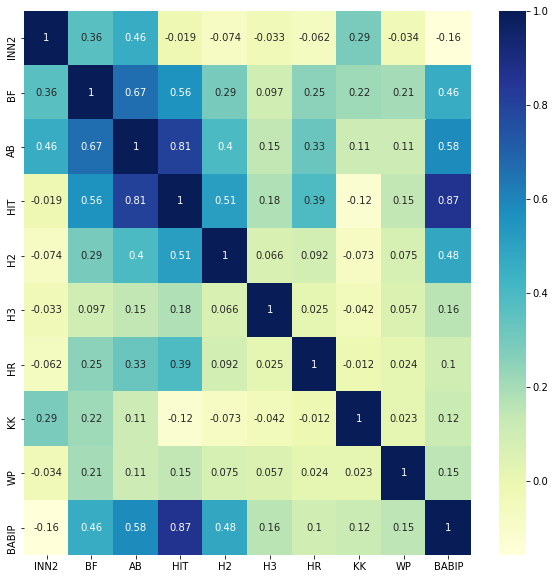

In [46]:
temp = team_pitcher.drop(['ER','ERA'],axis=1) #종속변수 drop
figure,ax1 = plt.subplots()
figure.set_size_inches(10,10)

sns.heatmap(temp.corr(),annot=True,cmap='YlGnBu')